In [1]:
from bigdatavqa.coreset import Coreset
from bigdatavqa.datautils import DataUtils
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
number_of_qubits = 10
data_location = "/home/yogi/Projects/experiments/VQA/data"
number_of_corsets_to_evaluate = 15
number_of_centroid_evaluation = 20

In [3]:
data_utils = DataUtils(data_location)
raw_data = data_utils.load_dataset()

Data loaded from /home/yogi/Projects/experiments/VQA/data/dataset.pickle


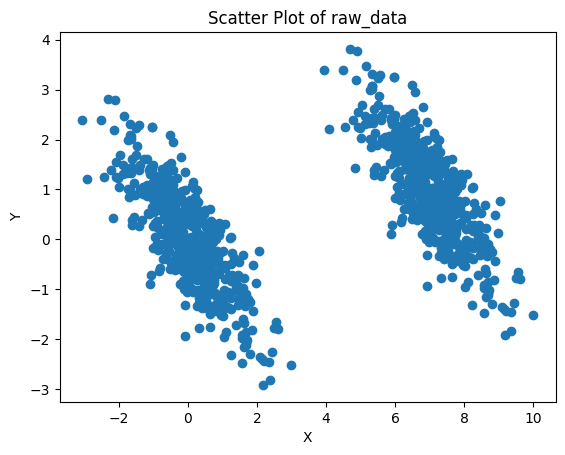

In [4]:
plt.scatter(raw_data[:, 0], raw_data[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of raw_data')
plt.show()


In [10]:
coreset = Coreset()
best_coreset_vectors, best_coreset_weights =  coreset.get_best_coresets(
    data_vectors=raw_data,
    number_of_runs=number_of_centroid_evaluation,
    coreset_size=number_of_qubits,
    size_vec_list=number_of_corsets_to_evaluate,
)

/home/yogi/.pyenv/versions/3.9.0/envs/VQA2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.9.0/envs/VQA2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.9.0/envs/VQA2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/yogi/.pyenv/versions/3.9.0/envs/VQA2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

In [15]:
best_coreset_vectors

array([[ 5.14533396,  3.46950836],
       [ 7.96991338,  0.48041513],
       [-0.76073814,  0.62646042],
       [ 6.3790566 ,  0.7207248 ],
       [-0.05639868, -0.6570355 ],
       [-0.20146494,  0.82958426],
       [ 6.57217587,  0.42087203],
       [ 0.58833333, -0.56888029],
       [ 1.40217611, -0.95620141],
       [ 4.49766827,  3.38723829]])

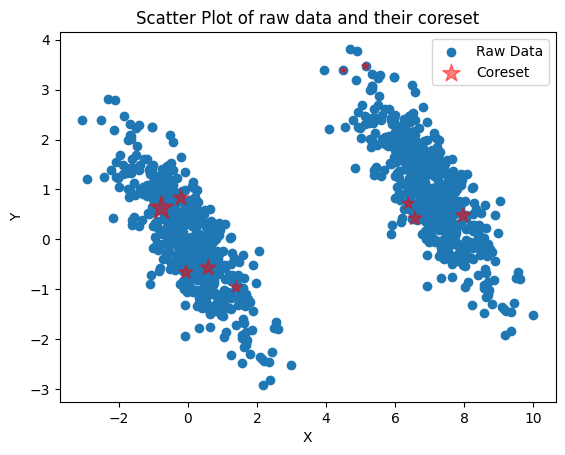

In [23]:
df = pd.DataFrame({'X': best_coreset_vectors[:,0], 'Y': best_coreset_vectors[:,1], 'Weights': best_coreset_weights})
plt.scatter(raw_data[:, 0], raw_data[:, 1], label='Raw Data')
plt.scatter(df['X'], df['Y'], s=df['Weights'], label='Coreset', alpha=0.5, color = 'r', marker='*')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of raw data and their coreset')
plt.legend()
plt.show()

